In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
xtem = ['lighter', 'knife']

In [ ]:
!mkdir /content/dataset
!mkdir /content/dataset/train
!mkdir /content/dataset/train/images
!mkdir /content/dataset/train/labels
!mkdir /content/tmp

!mkdir /content/tmp/lighter
%cd /content/tmp/lighter
!curl -L "https://app.roboflow.com/ds/fDDCIgfHDI?key=yS2mmIXSii" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

!mkdir /content/tmp/knife
%cd /content/tmp/knife
!curl -L "https://app.roboflow.com/ds/ht5Q34Yrmx?key=9zJ1d8PBaK" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
import os
import shutil
import time

def read_all_file(path):
    output = os.listdir(path)
    file_list = []

    for i in output:
        if os.path.isdir(path+"/"+i):
            file_list.extend(read_all_file(path+"/"+i))
        elif os.path.isfile(path+"/"+i):
            file_list.append(path+"/"+i)
    
    return file_list
    
def copy_all_file(file_list, new_path):
    for src_path in file_list:
        file = src_path.split("/")[-1]
        shutil.copyfile(src_path, new_path+"/"+file)
        
def move_imgs(xray_item, path):
    start_time = time.time() # 작업 시작 시간

    src_path = '/content/tmp/'+xray_item+'/train/'+path # 기존 폴더 경로
    new_path = '/content/dataset/train/'+path # 옮길 폴더 경로

    file_list = read_all_file(src_path)
    copy_all_file(file_list, new_path)

    print("=" * 40)
    print("러닝 타임 : {}".format(time.time() - start_time)) # 총 소요시간 계산

In [ ]:
for _ in range(len(xtem)):
    move_imgs(xtem[_],'images')

for _ in range(len(xtem)):
    move_imgs(xtem[_],'labels')

mkdir: cannot create directory ‘/content/dataset/train’: File exists
mkdir: cannot create directory ‘/content/dataset/train/images’: File exists
러닝 타임 : 0.24312734603881836
러닝 타임 : 0.361987829208374
러닝 타임 : 0.2700660228729248
러닝 타임 : 0.26003289222717285


In [ ]:
%cd /content/
!git clone https://github.com/ultralytics/yolov5.git

%cd /content/yolov5/
!pip install -r requirements.txt

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 10101, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 10101 (delta 1), reused 4 (delta 1), pack-reused 10094
Receiving objects: 100% (10101/10101), 10.37 MiB | 29.25 MiB/s, done.
Resolving deltas: 100% (7004/7004), done.
/content/yolov5
     |████████████████████████████████| 596 kB 9.0 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from glob import glob
from sklearn.model_selection import train_test_split

img_list = glob('/content/dataset/train/images/*.jpg')
print(len(img_list))

train_img_list, val_img_list = train_test_split(img_list, test_size=0.2, random_state=2021)
print(len(train_img_list), len(val_img_list))

5930
4744 1186


In [ ]:
with open('/content/dataset/train.txt', 'w') as f:
    f.write('\n'.join(train_img_list) + '\n')

with open('/content/dataset/val.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

In [ ]:
!cp /content/tmp/lighter/data.yaml /content/dataset

In [ ]:
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
    data = yaml.safe_load(f)

print(type(data), data)

'''data['names'] = xtem
data['nc'] = len(xtem)'''
data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
    yaml.dump(data, f)

print(type(data), data)

<class 'dict'> {'train': '../train/images', 'val': '../valid/images', 'nc': 18, 'names': ['Axe', 'Chisel', 'Firecracker', 'Gun', 'HDD', 'Hammer', 'HandCuffs', 'Knife', 'Lighter', 'Plier', 'Saw', 'Scissors', 'Screwdriver', 'SmartPhone', 'Spanner', 'SupplymentaryBattery', 'Throwing Knife', 'USB']}
<class 'dict'> {'train': '/content/dataset/train.txt', 'val': '/content/dataset/val.txt', 'nc': 18, 'names': ['Axe', 'Chisel', 'Firecracker', 'Gun', 'HDD', 'Hammer', 'HandCuffs', 'Knife', 'Lighter', 'Plier', 'Saw', 'Scissors', 'Screwdriver', 'SmartPhone', 'Spanner', 'SupplymentaryBattery', 'Throwing Knife', 'USB']}


In [ ]:
%cd /content/yolov5/

!python train.py --name total_yolov5s_results \
--img 416 --batch 16 --cfg ./models/yolov5s.yaml --weights yolov5s.pt \
--epochs 5 --data /content/dataset/data.yaml

/content/yolov5
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=5, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=total_yolov5s_results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-115-gbc48457 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0

detect: weights=['/content/yolov5/runs/train/total_yolov5s_results/weights/best.pt'], source=/content/dataset/train/images/H_8211-91-0000_17_661_png.rf.ddf1cf14cbe9685ba9c72622c459339a.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-115-gbc48457 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/dataset/train/images/H_8211-91-0000_17_661_png.rf.ddf1cf14cbe9685ba9c72622c459339a.jpg: 416x416 1 Chisel, Done. (0.007s)
Speed: 0.4ms pre-process, 7.4ms inference, 1.2ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
1 labels saved to 

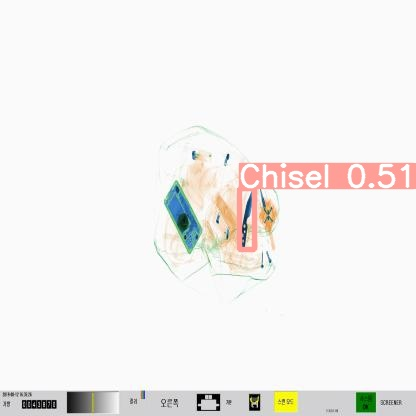

In [ ]:
from IPython.display import Image
import os

val_img_path = val_img_list[5]

!python detect.py --weights /content/yolov5/runs/train/total_yolov5s_results/weights/best.pt --save-txt --save-conf --exist-ok --img 416 --conf 0.5 --source '{val_img_path}'

Image(os.path.join('/content/yolov5/runs/detect/exp', os.path.basename(val_img_path)))

In [ ]:
for _ in range(40):
    print("=" * 40)
    val_img_path = val_img_list[_]
    !python detect.py --weights /content/yolov5/runs/train/total_yolov5s_results/weights/best.pt --save-txt --save-conf --exist-ok --img 416 --conf 0.5 --source '{val_img_path}'

detect: weights=['/content/yolov5/runs/train/total_yolov5s_results/weights/best.pt'], source=/content/dataset/train/images/H_8211-91-0000_04_642_png.rf.b67f74cefad07b4c6ae4a7506d4c0239.jpg, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-115-gbc48457 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 213 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /content/dataset/train/images/H_8211-91-0000_04_642_png.rf.b67f74cefad07b4c6ae4a7506d4c0239.jpg: 416x416 Done. (0.006s)
Speed: 0.3ms pre-process, 6.2ms inference, 0.7ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
1 labels saved to runs/detec